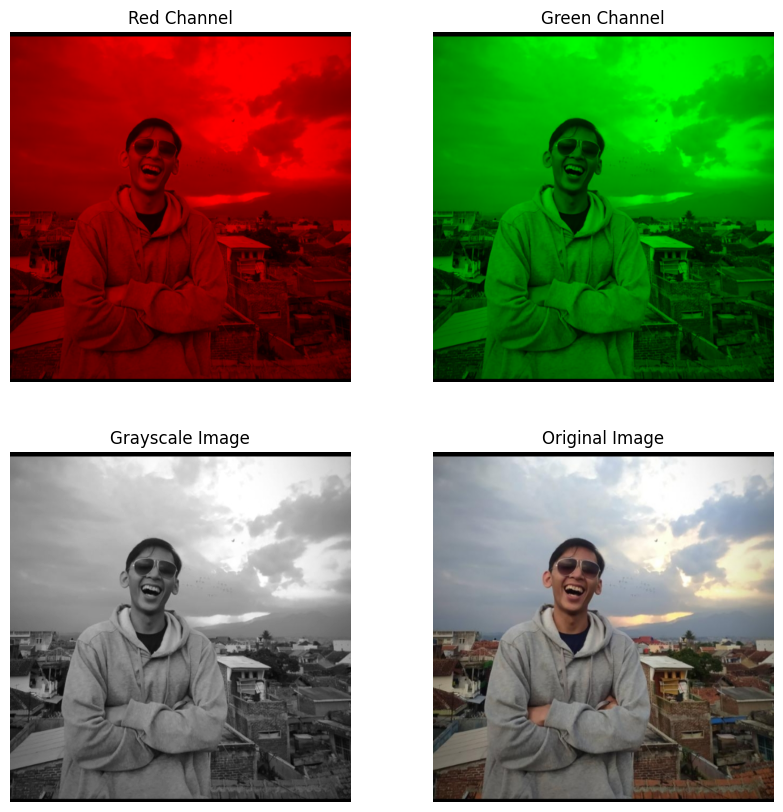

In [20]:
#dekomposisi R, G, B dari citra berwarna
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Step 5: Visualize the R, G, B channels separately
plt.figure(figsize=(10, 10))

# Red channel
plt.subplot(2, 2, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(2, 2, 2)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 3)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel')
plt.axis('off')

# Step 3: Visualize the Grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Original image for comparison
plt.subplot(2, 2, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()

1. Impor Library

import cv2
import numpy as np
from matplotlib import pyplot as plt
cv2: Library OpenCV untuk pemrosesan citra.
numpy: Library untuk operasi pada array dan matriks.
pyplot: Modul dari Matplotlib untuk visualisasi citra.

2. Memuat Gambar

image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)
Gambar dimuat dari path yang diberikan menggunakan cv2.imread(). Pastikan untuk menyesuaikan path dengan lokasi gambar di sistem Anda.

3. Konversi ke RGB

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
OpenCV memuat gambar dalam format BGR. Baris ini mengonversi gambar dari BGR ke RGB agar warna dapat ditampilkan dengan benar.

4. Pemisahan Saluran R, G, B

R, G, B = cv2.split(image_rgb)
Gambar RGB dipisahkan menjadi tiga saluran warna terpisah: Merah (R), Hijau (G), dan Biru (B) menggunakan cv2.split().

5. Konversi ke Grayscale

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Gambar asli diubah menjadi grayscale, menghasilkan gambar satu saluran yang merepresentasikan intensitas warna.

6. Membuat Matriks Nol

zeros = np.zeros(image.shape[:2], dtype="uint8")
Matriks nol dengan ukuran yang sama seperti gambar asli dibuat. Matriks ini diisi dengan nilai 0 (hitam) dan digunakan untuk visualisasi saluran warna.

7. Visualisasi Saluran R, G, B

plt.figure(figsize=(10, 10))
Membuat figure baru dengan ukuran 10x10 inci untuk menampilkan gambar.

Saluran Merah

plt.subplot(2, 2, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel')
plt.axis('off')
Menampilkan saluran merah dengan menggabungkan R dengan matriks nol untuk G dan B.

Saluran Hijau

plt.subplot(2, 2, 2)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel')
plt.axis('off')
Menampilkan saluran hijau dengan menggabungkan G dengan matriks nol untuk R dan B.

Saluran Biru


plt.subplot(2, 2, 3)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel')
plt.axis('off')
Menampilkan saluran biru dengan menggabungkan B dengan matriks nol untuk R dan G.

8. Visualisasi Gambar Grayscale


plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
Menampilkan gambar grayscale dengan colormap 'gray' untuk memastikan bahwa warna yang ditampilkan dalam skala abu-abu.

9. Menampilkan Gambar Asli

plt.subplot(2, 2, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
Menampilkan gambar asli (RGB) untuk referensi dan perbandingan.

10. Menampilkan Semua Gambar

plt.show()
Memanggil fungsi plt.show() untuk menampilkan semua subplot yang telah disiapkan.

Code 2

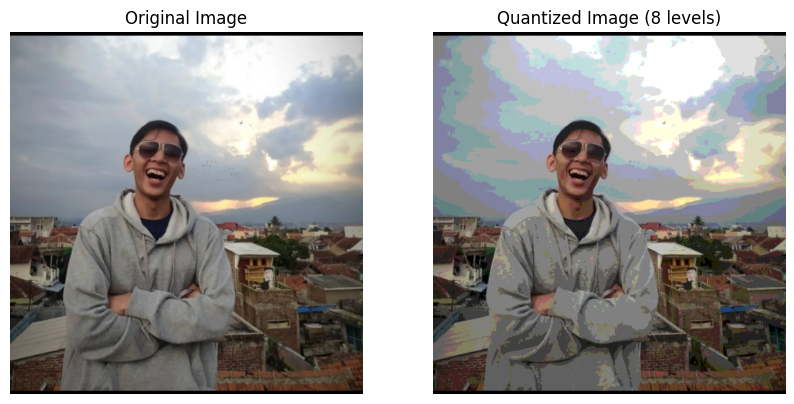

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Uniform Mapping (Normalize intensity between 0 and 255)
def uniform_mapping(channel):
    return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)

# Logarithmic Mapping
def logarithmic_mapping(channel):
    c = 255 / np.log(1 + np.max(channel))
    log_mapped = c * (np.log(channel + 1))
    return np.array(log_mapped, dtype=np.uint8)

# Step 5: Apply Uniform and Logarithmic Mapping to each channel
R_uniform = uniform_mapping(R)
G_uniform = uniform_mapping(G)
B_uniform = uniform_mapping(B)

R_log = logarithmic_mapping(R)
G_log = logarithmic_mapping(G)
B_log = logarithmic_mapping(B)

# Step 6: Visualize the R, G, B channels separately and with Uniform/Logarithmic mappings
plt.figure(figsize=(20, 20))

# Original Red channel
plt.subplot(3, 3, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel (Original)')
plt.axis('off')

# Uniform Red
plt.subplot(3, 3, 2)
uniform_red_image = cv2.merge([R_uniform, zeros, zeros])
plt.imshow(uniform_red_image)
plt.title('Red Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Red
plt.subplot(3, 3, 3)
log_red_image = cv2.merge([R_log, zeros, zeros])
plt.imshow(log_red_image)
plt.title('Red Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Green channel
plt.subplot(3, 3, 4)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel (Original)')
plt.axis('off')

# Uniform Green
plt.subplot(3, 3, 5)
uniform_green_image = cv2.merge([zeros, G_uniform, zeros])
plt.imshow(uniform_green_image)
plt.title('Green Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Green
plt.subplot(3, 3, 6)
log_green_image = cv2.merge([zeros, G_log, zeros])
plt.imshow(log_green_image)
plt.title('Green Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Blue channel
plt.subplot(3, 3, 7)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel (Original)')
plt.axis('off')

# Uniform Blue
plt.subplot(3, 3, 8)
uniform_blue_image = cv2.merge([zeros, zeros, B_uniform])
plt.imshow(uniform_blue_image)
plt.title('Blue Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Blue
plt.subplot(3, 3, 9)
log_blue_image = cv2.merge([zeros, zeros, B_log])
plt.imshow(log_blue_image)
plt.title('Blue Channel (Logarithmic Mapping)')
plt.axis('off')

plt.tight_layout()
plt.show()


1. Import Library

import cv2
import numpy as np
from matplotlib import pyplot as plt
cv2: Library OpenCV digunakan untuk pemrosesan citra.
numpy: Digunakan untuk manipulasi array.
pyplot: Modul dari Matplotlib digunakan untuk visualisasi data.

2. Memuat Citra

image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)
Gambar di-load dari jalur yang diberikan. cv2.imread() membaca citra dalam format BGR.

3. Konversi dari BGR ke RGB

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
OpenCV secara default membaca citra dalam format BGR, sehingga perlu dikonversi ke RGB agar warna ditampilkan dengan benar.

4. Pisahkan Saluran Warna

R, G, B = cv2.split(image_rgb)
Citra dipisahkan menjadi tiga saluran warna: Merah (R), Hijau (G), dan Biru (B).

5. Buat Matriks Nol untuk Visualisasi


zeros = np.zeros(image.shape[:2], dtype="uint8")
Matriks nol dengan ukuran yang sama dengan citra digunakan untuk membantu visualisasi ketika membuat citra baru dengan hanya satu saluran warna.

6. Fungsi Pemetaan
Uniform Mapping

def uniform_mapping(channel):
    return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)
Fungsi ini menormalkan nilai intensitas saluran antara 0 dan 255.
Logarithmic Mapping

def logarithmic_mapping(channel):
    c = 255 / np.log(1 + np.max(channel))
    log_mapped = c * (np.log(channel + 1))
    return np.array(log_mapped, dtype=np.uint8)
Fungsi ini menerapkan pemetaan logaritmik, yang memperkuat area dengan intensitas rendah dan meredam area dengan intensitas tinggi.

7. Terapkan Pemetaan ke Setiap Saluran

R_uniform = uniform_mapping(R)
G_uniform = uniform_mapping(G)
B_uniform = uniform_mapping(B)

R_log = logarithmic_mapping(R)
G_log = logarithmic_mapping(G)
B_log = logarithmic_mapping(B)
Masing-masing saluran (R, G, B) diolah dengan kedua metode pemetaan.

8. Visualisasi Hasil

plt.figure(figsize=(20, 20))
Membuat figure dengan ukuran yang besar untuk visualisasi.
Visualisasi Saluran Merah
Subplot untuk saluran merah asli, pemetaan uniform, dan pemetaan logaritmik:
python

plt.subplot(3, 3, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel (Original)')
plt.axis('off')
Proses serupa dilakukan untuk saluran hijau dan biru.

9. Pengaturan Layout dan Menampilkan

plt.tight_layout()
plt.show()
plt.tight_layout() digunakan untuk mencegah subplot saling tumpang tindih, dan plt.show() menampilkan hasil visualisasi.